<a href="https://colab.research.google.com/github/mojodean/aai-530-final-project/blob/vperng/530_IoT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Google Colab compatibility
from google.colab import drive
drive.mount('/content/drive')
!pip install opendatasets

Mounted at /content/drive


In [3]:
# Import Libraries
import opendatasets as od
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime


# Data Preprocessing and Exploration

In [4]:
# Download path
download_path = '/content/drive/MyDrive/Colab Notebooks/530-IoT-Project'
os.chdir(download_path)

# # Load dataset from Kaggle
# od.download("https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information?resource=download",
#             data_dir=download_path)

In [5]:
# File path
file_path = os.path.join(download_path, "smart-home-dataset-with-weather-information/HomeC.csv")

# Load dataset into DataFrame
df = pd.read_csv(file_path, low_memory = False)

In [ ]:
# Print first 5 rows
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [ ]:
# Print last 5 rows
df.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Inspect missing values and type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

<Axes: >

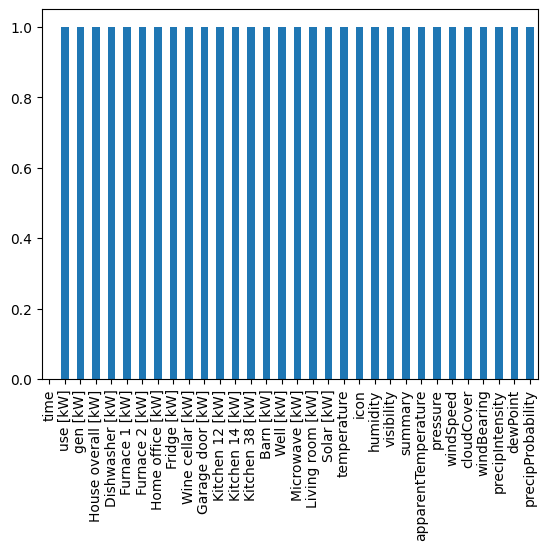

In [ ]:
# Plot missing value counts
df.isnull().sum().plot.bar()

In [6]:
# Remove missing data since it is only 1 row (last row)
df = df.dropna()

df.isnull().sum()

,0
time,0
use [kW],0
gen [kW],0
House overall [kW],0
Dishwasher [kW],0
Furnace 1 [kW],0
Furnace 2 [kW],0
Home office [kW],0
Fridge [kW],0
Wine cellar [kW],0


In [ ]:
# Summary statistics
df.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [7]:
# Convert UNIX time to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='s')
df['datetime'].head()

<ipython-input-7-829b5d54a1ba>:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['datetime'] = pd.to_datetime(df['time'], unit='s')


,datetime
0,2016-01-01 05:00:00
1,2016-01-01 05:00:01
2,2016-01-01 05:00:02
3,2016-01-01 05:00:03
4,2016-01-01 05:00:04


In [8]:
# Dataset creator mentioned that the timesteps are meant to be per min instead of sec
# Convert to 1 minute intervals
df['datetime'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00',
                                                periods=len(df),
                                                freq='min'))
df['datetime'].head(5)

,datetime
0,2016-01-01 05:00:00
1,2016-01-01 05:01:00
2,2016-01-01 05:02:00
3,2016-01-01 05:03:00
4,2016-01-01 05:04:00


In [10]:
df['datetime'].describe()

,datetime
count,503910
mean,2016-06-24 04:14:30.000001280
min,2016-01-01 05:00:00
25%,2016-03-28 16:37:15
50%,2016-06-24 04:14:30
75%,2016-09-19 15:51:45
max,2016-12-16 03:29:00


In [30]:
# Columns of interest
home_apps = ['Dishwasher [kW]',
             'Furnace 1 [kW]',
             'Furnace 2 [kW]',
             'Home office [kW]',
             'Fridge [kW]',
             'Wine cellar [kW]',
             'Garage door [kW]',
             'Kitchen 12 [kW]',
             'Kitchen 14 [kW]',
             'Kitchen 38 [kW]',
             'Barn [kW]',
             'Well [kW]',
             'Microwave [kW]',
             'Living room [kW]',
             'Solar [kW]',
             'House overall [kW]',
             'temperature']

<ipython-input-31-7754217eea85>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.groupby(pd.Grouper(key='datetime', freq='M'))[home_apps].mean()


Text(0.5, 0.9, 'Monthly Averages for Home Applications')

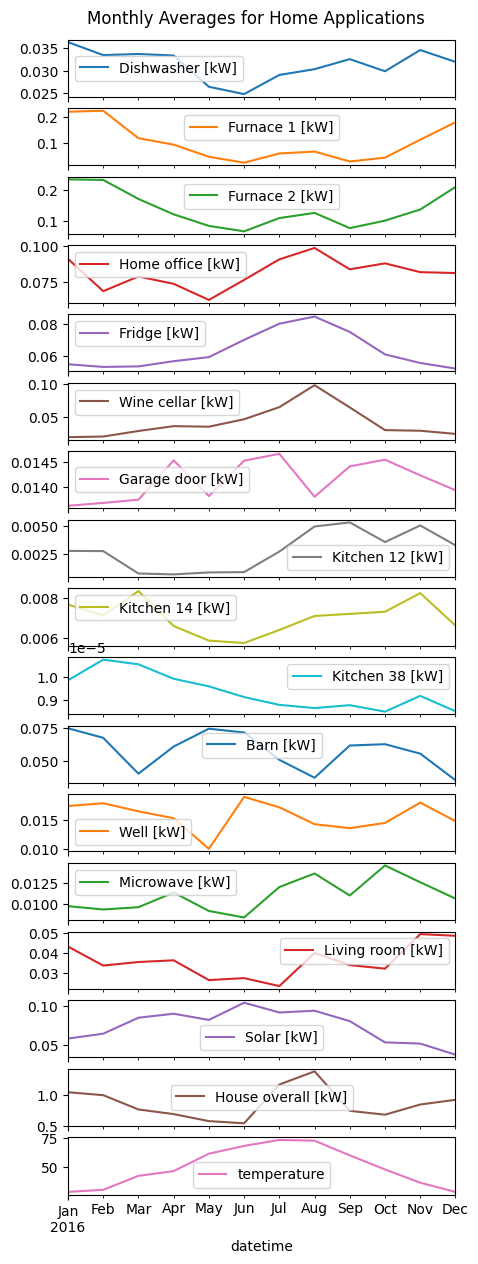

In [31]:
# Create line plots using monthly average of each feature
monthly_avg = df.groupby(pd.Grouper(key='datetime', freq='M'))[home_apps].mean()
monthly_avg.plot(y=home_apps, subplots=True, figsize=(5,15))
plt.suptitle("Monthly Averages for Home Applications", y=0.9)



In [32]:
monthly_avg.head()

,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],House overall [kW],temperature
datetime,,,,,,,,,,,,,,,,,
2016-01-31,0.036391,0.221591,0.235614,0.091203,0.054945,0.018962,0.013646,0.002758,0.007653,0.000010,0.074741,0.017278,0.009687,0.043328,0.058560,1.043215,28.721361
2016-02-29,0.033503,0.225371,0.233713,0.068263,0.053283,0.019935,0.013701,0.002737,0.007114,0.000011,0.067462,0.017746,0.009292,0.033737,0.064756,0.995164,30.472338
2016-03-31,0.033748,0.120040,0.172221,0.078668,0.053609,0.028416,0.013763,0.000697,0.008329,0.000011,0.040141,0.016394,0.009563,0.035528,0.085032,0.762251,42.423383
2016-04-30,0.033412,0.095146,0.122305,0.073455,0.056828,0.035844,0.014524,0.000615,0.006584,0.000010,0.060805,0.015240,0.011308,0.036382,0.090128,0.686640,46.511224
2016-05-31,0.026452,0.048578,0.084887,0.062029,0.059334,0.034979,0.013834,0.000795,0.005856,0.000010,0.074412,0.010102,0.009116,0.026413,0.082229,0.572376,61.404635


Text(0.5, 0.9, '30-Day Moving Averages for Home Applications')

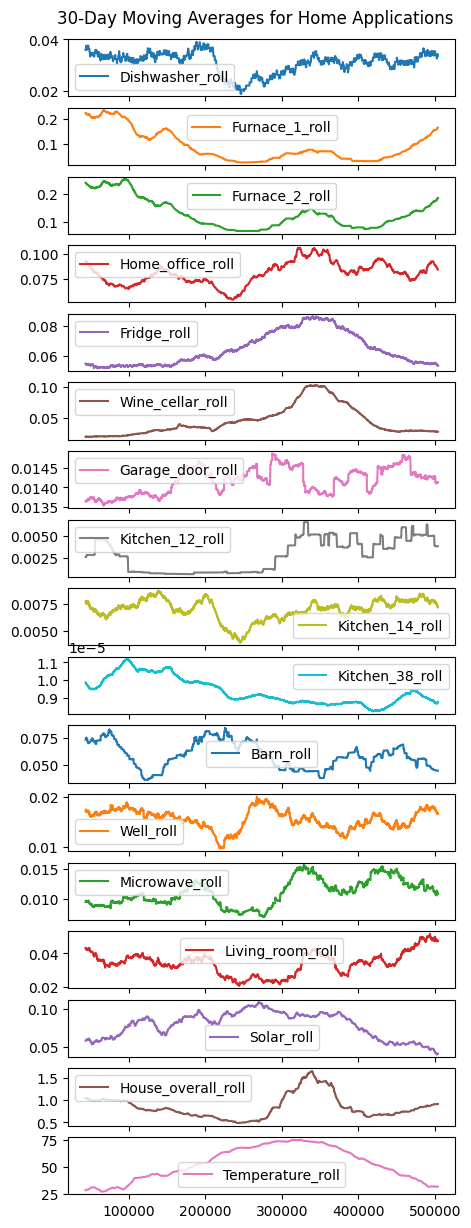

In [34]:
# Create line plots of 30-day moving average
columns_rolling = ['Dishwasher_roll',
                   'Furnace_1_roll',
                   'Furnace_2_roll',
                   'Home_office_roll',
                   'Fridge_roll',
                   'Wine_cellar_roll',
                   'Garage_door_roll',
                   'Kitchen_12_roll',
                   'Kitchen_14_roll',
                   'Kitchen_38_roll',
                   'Barn_roll',
                   'Well_roll',
                   'Microwave_roll',
                   'Living_room_roll',
                   'Solar_roll',
                   'House_overall_roll',
                   'Temperature_roll'
                   ]

df[columns_rolling] = df[home_apps].rolling(43200).mean()
df.plot(y=columns_rolling, subplots=True, figsize=(5,15))
plt.suptitle("30-Day Moving Averages for Home Applications", y=0.9)

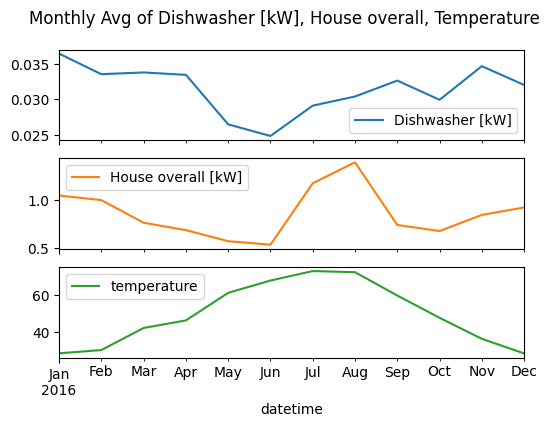

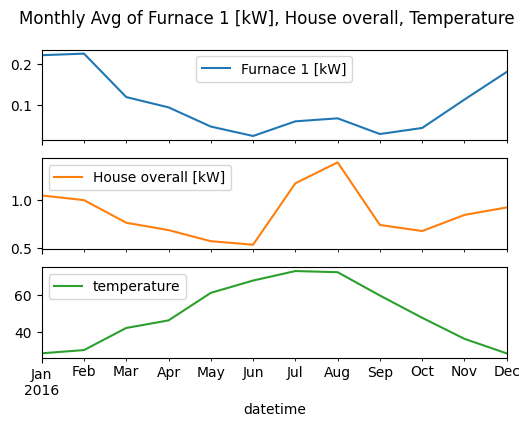

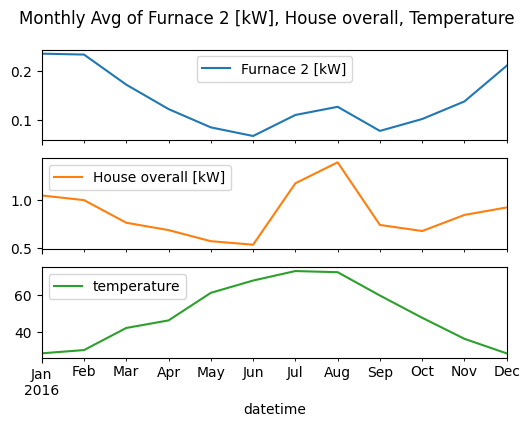

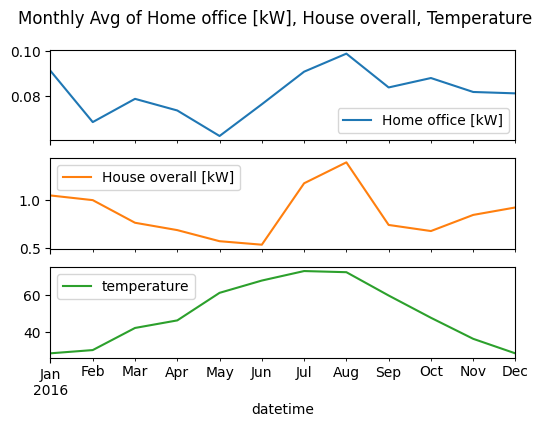

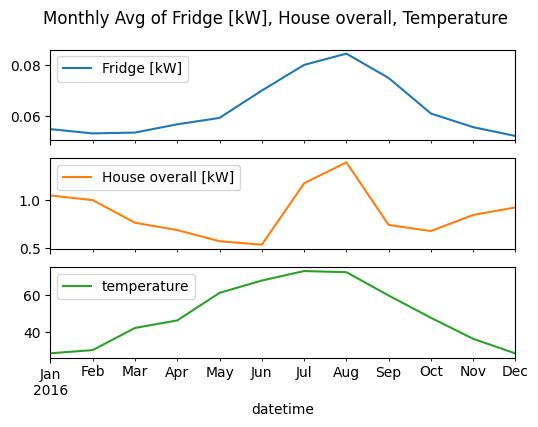

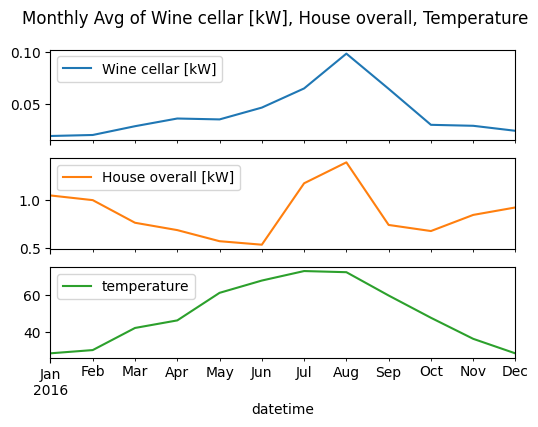

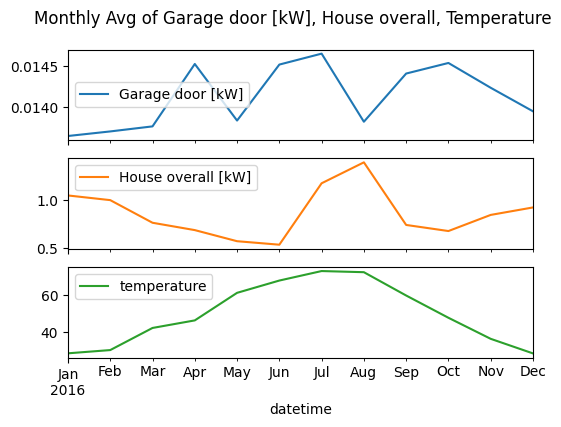

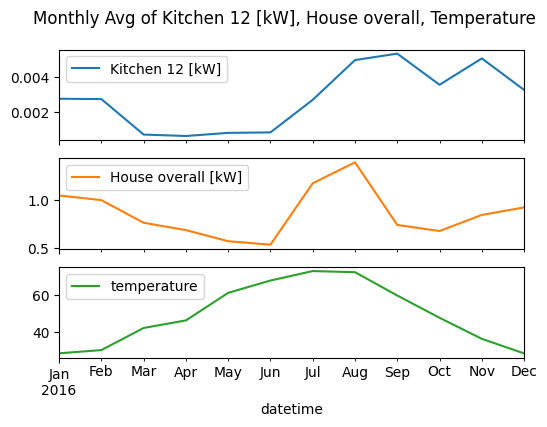

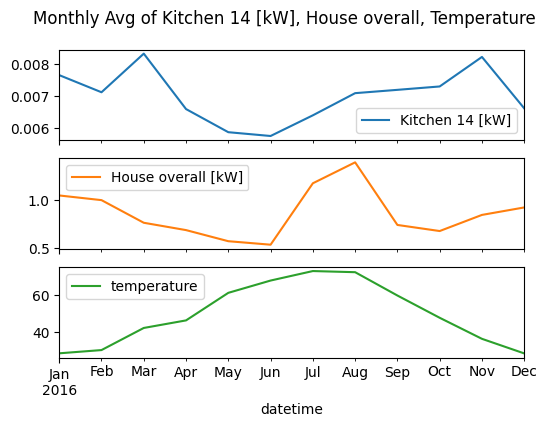

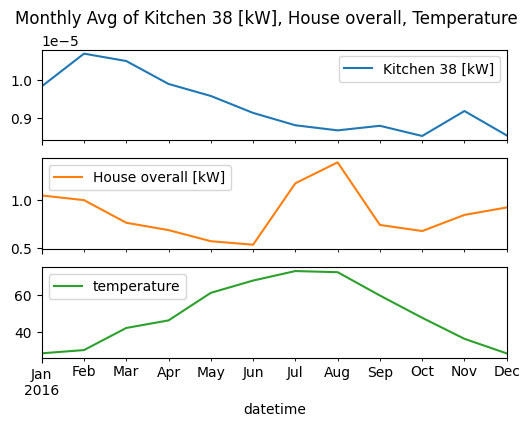

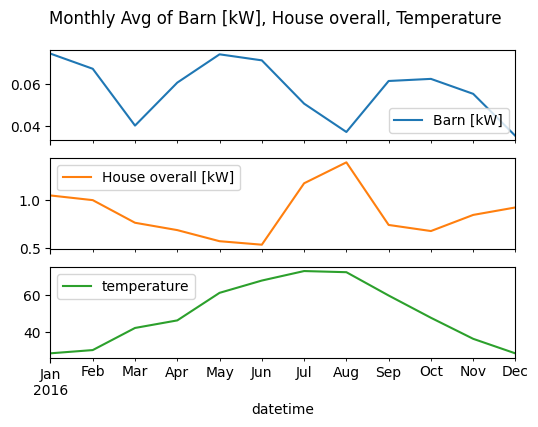

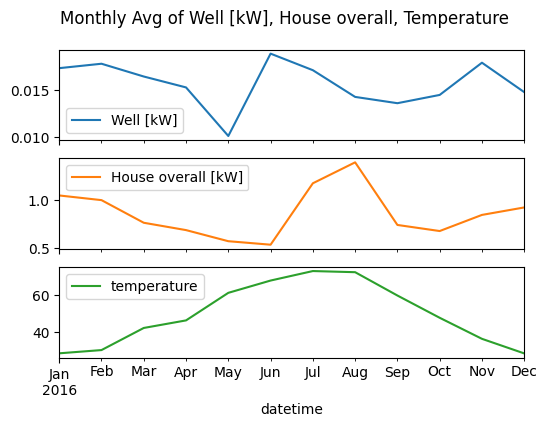

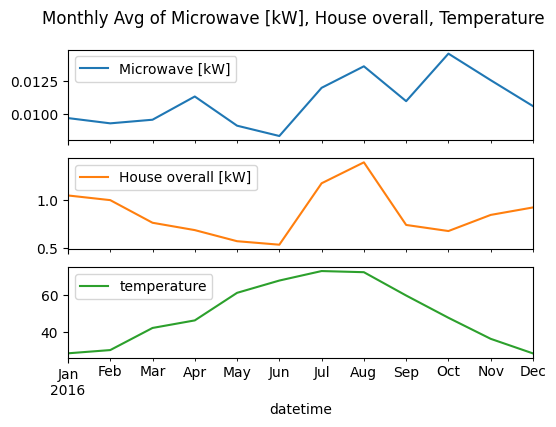

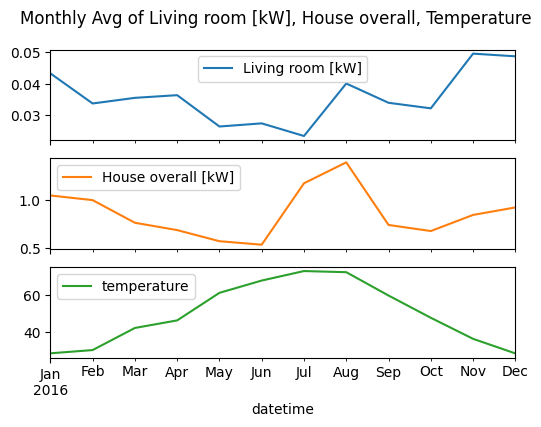

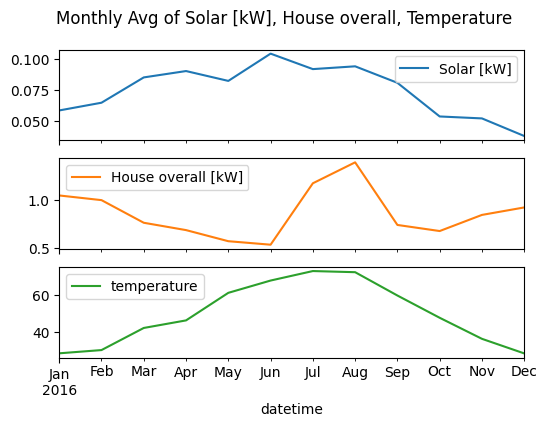

In [37]:
for col in home_apps[:-2]:
    monthly_avg.plot(y=[col, 'House overall [kW]','temperature'],
                     subplots=True,
                     figsize=(6,4))
    plt.suptitle(f"Monthly Avg of {col}, House overall, Temperature")

In [10]:
# Continuous features
cont_feat = ['Dishwasher [kW]',
             'Furnace 1 [kW]',
             'Furnace 2 [kW]',
             'Home office [kW]',
             'Fridge [kW]',
             'Wine cellar [kW]',
             'Garage door [kW]',
             'Kitchen 12 [kW]',
             'Kitchen 14 [kW]',
             'Kitchen 38 [kW]',
             'Barn [kW]',
             'Well [kW]',
             'Microwave [kW]',
             'Living room [kW]',
             'Solar [kW]',
             'temperature',
             'humidity',
             'visibility',
             'apparentTemperature',
             'pressure',
             'windSpeed',
             'windBearing',
             'precipIntensity',
             'dewPoint',
             'precipProbability',
             'House overall [kW]',
             ]


Text(0.5, 1.0, 'Correlation Matrix between Continuous Features')

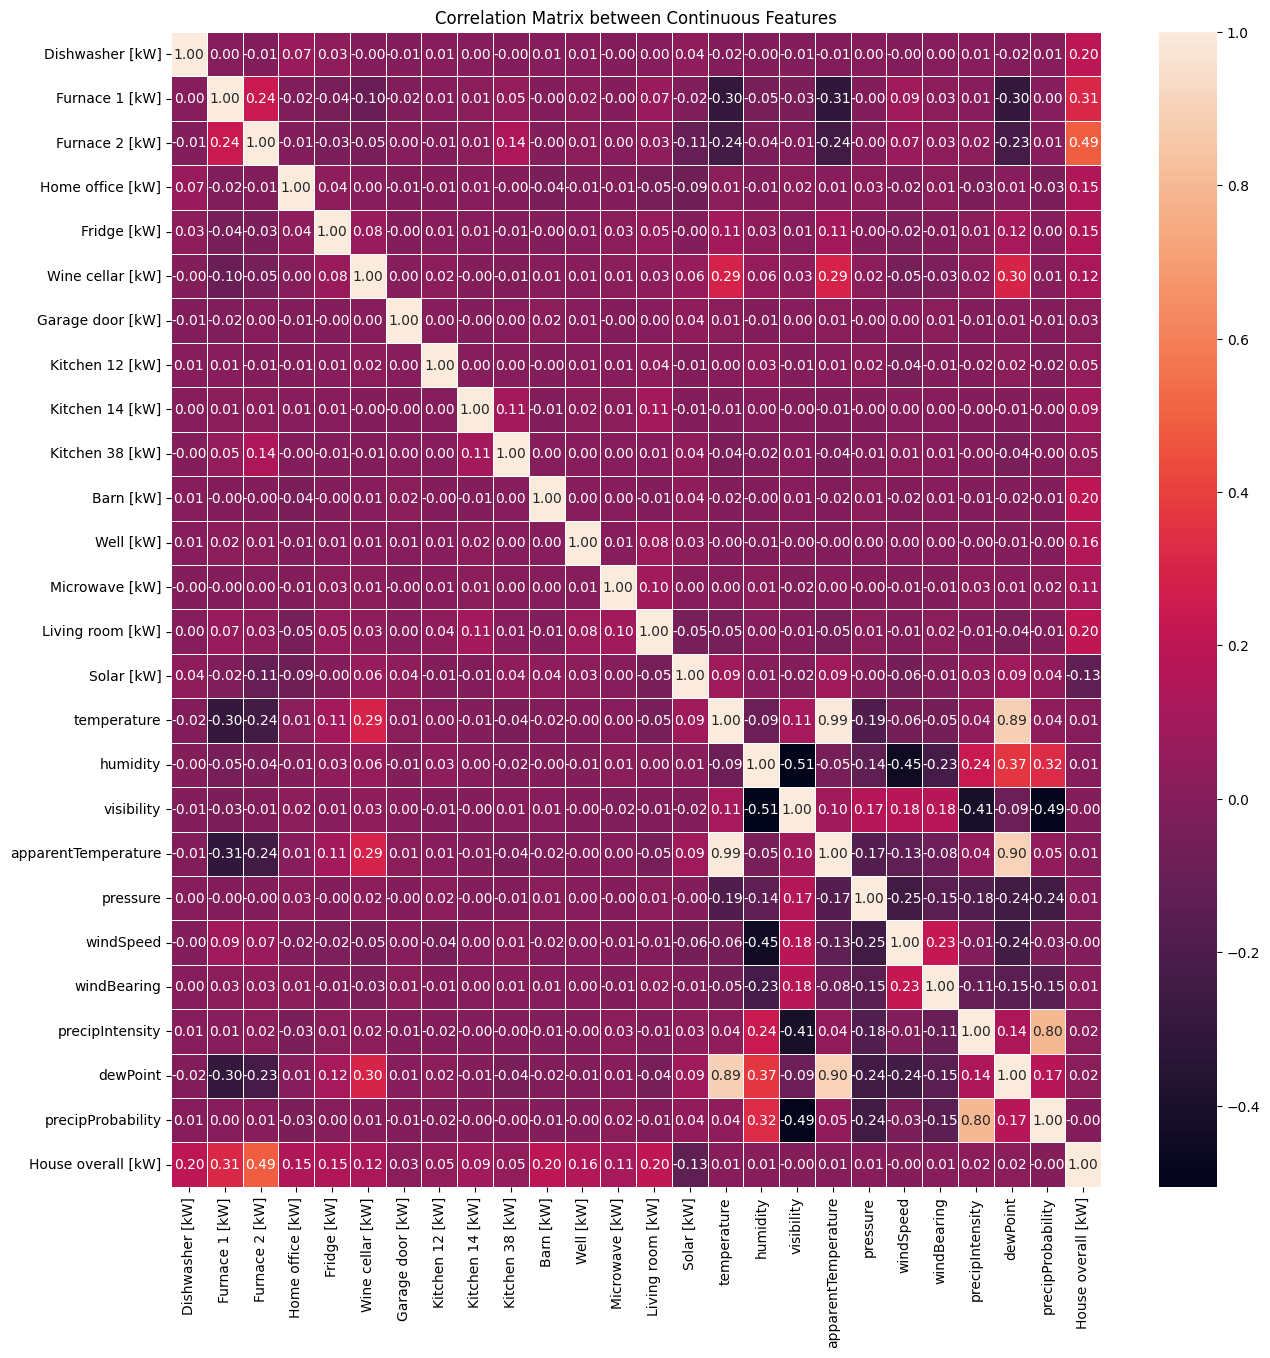

In [21]:
correlation_matrix = df[cont_feat].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Continuous Features')
